# Tutorial: fitting a line

In this tutorial you will learn:

 - How to fit a line to data with error bars
 - How to obtain the intrinsic scatter and its uncertainties
 - How to quantify the numerical error of the sampling
 - How to compare empirical models


Lets say we want to fit a line to some data points.

Here is our data: measurements of three observables (The bulge mass of galaxies, the velocity dispersion and the mass of the black hole.

In [1]:
import numpy as np
# Black hole data from Kormendy & Ho (2014) https://arxiv.org/abs/1304.7762 https://arxiv.org/abs/1308.6483
# Bulge mass and error (log Msun)
mB = np.array([9.05, 11.84, 11.27, 10.65, 11.5, 11.74, 11.33, 10.26, 11.06, 11.61, 10.5, 10.91, 11.26, 11.01, 11.77, 11.65, 10.85, 11.62, 11.51, 10.88, 11.84, 10.85, 11.72, 9.64, 11.64, 10.97, 11.16, 12.09, 11.28, 11.05, 11.65, 11.6, 11.0, 10.57, 11.69, 11.25, 11.61, 11.65, 11.75, 11.6, 11.81, 11.78])
mBerr = np.array([0.1, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1, 0.09, 0.09, 0.09, 0.1, 0.09])
# Black hole mass, errors, and magnitude
mBH = np.log10([2.45e+06, 1.69e+08, 1.47e+09, 5.90e+08, 8.81e+08, 4.65e+09, 3.87e+09,
 1.45e+07, 1.08e+07, 3.72e+09, 1.78e+08, 4.16e+08, 1.37e+08, 4.65e+08,
 9.09e+09, 5.29e+08, 9.78e+08, 9.25e+08, 1.30e+07, 6.96e+07, 2.54e+09,
 9.00e+07, 6.15e+09, 6.00e+08, 4.72e+09, 2.02e+08, 1.71e+09, 2.08e+10,
 8.55e+08, 5.69e+07, 4.75e+09, 3.69e+09, 2.73e+08, 4.87e+08, 3.74e+09,
 2.10e+09, 3.96e+08, 2.30e+09, 1.34e+09, 2.48e+09, 3.74e+09, 1.30e+09])
mBHlo = np.log10([1.43e+06, 1.39e+08, 1.27e+09, 5.39e+08, 4.35e+08, 4.24e+09, 3.16e+09,
 0.10e+07, 1.03e+07, 3.21e+09, 8.50e+07, 3.12e+08, 9.00e+07, 3.66e+08,
 6.28e+09, 4.21e+08, 6.70e+08, 8.38e+08, 0.10e+07, 5.62e+07, 2.44e+09,
 4.50e+07, 5.78e+09, 4.00e+08, 3.67e+09, 1.52e+08, 1.52e+09, 4.90e+09,
 4.07e+08, 4.65e+07, 2.81e+09, 2.65e+09, 1.94e+08, 3.34e+08, 2.59e+09,
 2.00e+09, 2.40e+08, 2.19e+09, 9.30e+08, 2.29e+09, 3.22e+09, 1.11e+09])
mBHhi = np.log10([3.460e+06, 1.970e+08, 1.680e+09, 6.510e+08, 1.781e+09, 5.380e+09,
 4.480e+09, 2.910e+07, 1.120e+07, 3.830e+09, 2.720e+08, 5.200e+08,
 1.820e+08, 5.640e+08, 1.143e+10, 6.360e+08, 1.286e+09, 1.023e+09,
 2.240e+08, 8.290e+07, 3.120e+09, 1.350e+08, 6.530e+09, 9.000e+08,
 5.760e+09, 2.530e+08, 1.810e+09, 3.660e+10, 1.293e+09, 6.730e+07,
 5.630e+09, 3.790e+09, 3.410e+08, 6.400e+08, 5.500e+09, 2.730e+09,
 6.720e+08, 3.450e+09, 1.850e+09, 2.960e+09, 4.160e+09, 1.500e+09])

# Velocity dispersion and error (km/s)
sigma = np.array([77.0, 226.0, 328.0, 167.0, 315.0, 276.0, 270.0, 175.0, 166.0, 297.0, 145.0, 206.0, 229.0, 182.0, 270.0, 315.0, 242.0, 296.0, 182.0, 167.0, 300.0, 190.0, 324.0, 185.0, 380.0, 177.0, 355.0, 347.0, 222.0, 150.0, 333.0, 328.0, 183.0, 239.0, 318.0, 389.0, 266.0, 292.0, 257.0, 331.0, 288.0, 322.0])
sigmaerr = np.array([3.0, 9.0, 9.0, 3.0, 3.0, 2.0, 10.0, 8.0, 16.0, 12.0, 7.0, 10.0, 11.0, 9.0, 27.0, 15.0, 12.0, 14.0, 5.0, 8.0, 7.0, 9.0, 28.0, 9.0, 19.0, 8.0, 14.0, 5.0, 11.0, 7.0, 2.0, 11.0, 9.0, 11.0, 2.0, 3.0, 13.0, 5.0, 26.0, 5.0, 14.0, 16.0])

n_data = len(mBerr)

## Visualise the data

Lets plot the data first to see what is going on:

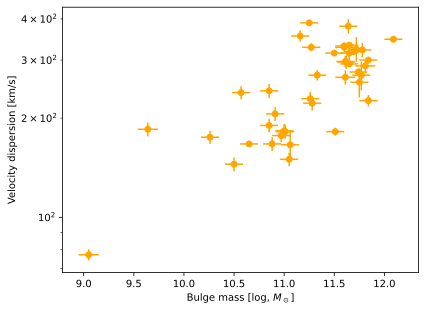

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
xlabel = 'Bulge mass [log, $M_\odot$]'
ylabel = 'Velocity dispersion [km/s]'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.errorbar(x=mB, xerr=mBerr, y=sigma, yerr=sigmaerr, 
             marker='o', ls=' ', color='orange')
plt.yscale('log')

## Data properties

This scatter plot shows: 

* error bars in both x and y
* intrinsic scatter

### Resampling the data

We could also represent each data point by a cloud of samples.
Each point represents a possible true solution of that galaxy.


In [3]:
samples = []

plt.figure()
for i in range(n_data):
    # draw normal random points
    
    # scale according to error bars and values
    samples_mBi = np.random.normal(mB[i], mBerr[i], size=400)
    
    # same for sigma
    samples_sigmai = np.random.normal(sigma[i], sigmaerr[i], size=400)
    
    # we will work in log-sigma:
    samples_logsigmai = np.log10(samples_sigmai)
    
    samples.append([samples_mBi, samples_logsigmai])
    
    # for each galaxy, plot alittle cloud with its own colors
    plt.scatter(samples_mBi, samples_logsigmai, s=2, marker='x')

samples = np.array(samples)
xlabel = 'Bulge mass [log, $M_\odot$]'
ylabel = 'Velocity dispersion [log, km/s]'
plt.xlabel(xlabel)
plt.ylabel(ylabel)


Text(0, 0.5, 'Velocity dispersion [log, km/s]')

In [4]:
samples.shape

(42, 2, 400)

## Model

Lets fit a line model with intrinsic, gaussian scatter.

$$ y \sim \mathrm{Normal}(x \times alpha + beta, sigma) $$

The model has three unknown parameters:

* the slope $\alpha$
* the offset $\beta$
* the scatter $\sigma$

Lets write down prior ranges for these parameters:


In [5]:
parameters = ['slope', 'offset', 'scatter']

def prior_transform(cube):
    # the argument, cube, consists of values from 0 to 1
    # we have to convert them to physical scales
    
    params = cube.copy()
    # let slope go from -3 to +3
    lo = -3
    hi = +3
    params[0] = cube[0] * (hi - lo) + lo
    # let offset go from 10 to 1000 km/s -- use log
    lo = np.log10(10)
    hi = np.log10(1000)
    params[1] = cube[1] * (hi - lo) + lo
    # let scatter go from 0.001 to 10
    lo = np.log10(0.001)
    hi = np.log10(10)
    params[2] = 10**(cube[2] * (hi - lo) + lo)
    return params


Define the likelihood, which measures how far the data are from the model predictions.
More precisely, how often the data would arise under the given parameters.

In [6]:
import scipy.stats

def log_likelihood(params):
    # unpack the current parameters:
    slope, offset, scatter = params

    # compute for each x point, where it should lie in y
    y_expected = (samples[:,0] - 10) * slope + offset
    # compute the probability of each sample
    probs_samples = scipy.stats.norm(y_expected, scatter).pdf(samples[:,1])
    # average over each galaxy, because we assume one of the points is the correct one (logical OR)
    probs_objects = probs_samples.mean(axis=1)
    assert len(probs_objects) == n_data
    # multiply over the galaxies, because we assume our model holds true for all objects (logical AND)
    # for numerical stability, we work in log and avoid zeros
    loglike = np.log(probs_objects + 1e-100).sum()
    return loglike



Implicitly, this model assumes that the velocity dispersion is predicted by the bulge mass.
Alternatively, one could flip the axes. Or define the scatter orthogonally.
But lets stick with our approach for now.


## Solving the problem

In [7]:
import ultranest

sampler = ultranest.ReactiveNestedSampler(parameters, log_likelihood, prior_transform)

Lets first try with relatively poor sampling:

In [8]:
result = sampler.run(min_num_live_points=50, min_ess=100) # you can increase these numbers later

[ultranest] Sampling 50 live points from prior ...


[ultranest] Explored until L=4e+01  


[ultranest] Likelihood function evaluations: 2426


[ultranest]   logZ = 29.34 +- 0.3614


[ultranest] Effective samples strategy satisfied (ESS = 238.6, need >100)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.21 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.81, need <0.5)


[ultranest]   logZ error budget: single: 0.46 bs:0.36 tail:0.01 total:0.36 required:<0.50


[ultranest] done iterating.


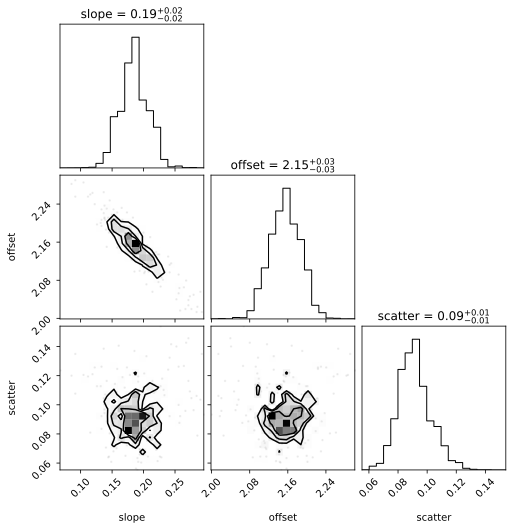

In [9]:
from ultranest.plot import cornerplot
cornerplot(sampler.results)

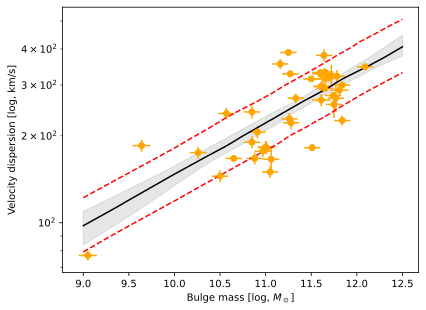

In [10]:
plt.figure()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.errorbar(x=mB, xerr=mBerr, y=sigma, yerr=sigmaerr, 
             marker='o', ls=' ', color='orange')

from ultranest.plot import PredictionBand
x = np.linspace(9, 12.5, 400)
band = PredictionBand(x)
band_lo = PredictionBand(x)
band_hi = PredictionBand(x)

for params in sampler.results['samples'][:40]:
    slope, offset, scatter = params
    y = (x - 10) * slope + offset
    band.add(10**y)
    
    # indicate intrinsic scatter
    band_hi.add(10**(y + scatter))
    band_lo.add(10**(y - scatter))

band.shade(color='k', alpha=0.1)
band.line(color='k')
band_lo.line(color='r', ls='--')
band_hi.line(color='r', ls='--')

plt.yscale('log');


## Understanding the uncertainties

Lets focus on the scatter parameter.

We want to understand how well we can constrain it.

We can make a histogram of the posterior samples:

Text(0, 0.5, 'Posterior probability')

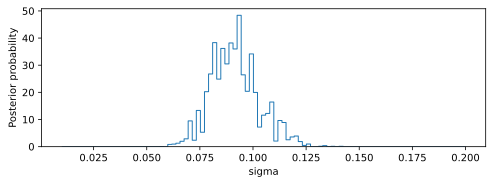

In [11]:
scatter_samples = result['weighted_samples']['points'][:,2]
weights = result['weighted_samples']['weights']

plt.figure(figsize=(8, 2.5))

bins=np.linspace(0.01, 0.2, 100)
plt.hist(scatter_samples, weights=weights, bins=bins, density=True, histtype='step')

plt.xlabel('sigma')
plt.ylabel("Posterior probability")


## Quantifying the distribution tails

But how well do we really know this probability distribution? We put uncertainties on it, because UltraNest provides bootstrapped weights, which emulates multiple (30) runs with a different number of live points.

In [12]:
result['weighted_samples']['bootstrapped_weights'].shape

(898, 30)

In [13]:
from fastkde import fastKDE

(0.001, 50.0)

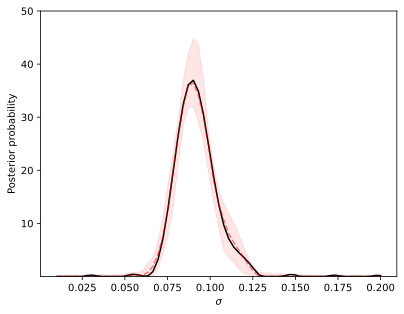

In [14]:
plt.figure()
bins=np.linspace(0.01, 0.2, 64+1)
scatter_samples = result['samples'][:,2]

pdf, _ = fastKDE.pdf(scatter_samples, axes=(bins,))
plt.plot(bins, pdf, color='k')

from ultranest.plot import PredictionBand
from ultranest.integrator import resample_equal
band = PredictionBand(bins)

for weights in result['weighted_samples']['bootstrapped_weights'].transpose():
    scatter_samples = resample_equal(result['weighted_samples']['points'][:,2], weights)
    pdf, _ = fastKDE.pdf(scatter_samples, axes=(bins,))
    band.add(pdf)

band.line(ls='--', color='r', alpha=0.5)
band.shade(0.49, color='r', alpha=0.1)


plt.xlabel('$\sigma$')
plt.ylabel("Posterior probability")
#plt.yscale('log')
plt.ylim(1e-3, 50);


![title](static/recursion.jpg)

### Task for you

Edit this notebook. Try adjusting the number of live points (min_num_live_points) and effective sample size (min_ess) parameters above to decrease the uncertainties.



## Comparing empirical models

We are using an ad-hoc/empirical model function,
and it does not have well-defined priors.
Because of that, doing Bayesian model comparison with Bayes factors does not make sense.

Instead, we can compare models based on their information content, and their
prediction power.

Lets see how much better the line model is to a constant.

In [15]:
parameters0 = ['offset', 'scatter']

def prior_transform0(cube):
    params = cube.copy()
    # let offset go from 10 to 1000 km/s -- use log
    lo = np.log10(10)
    hi = np.log10(1000)
    params[0] = cube[0] * (hi - lo) + lo
    # let scatter go from 0.001 to 10
    lo = np.log10(0.001)
    hi = np.log10(10)
    params[1] = 10**(cube[1] * (hi - lo) + lo)
    return params


def log_likelihood0(params):
    # unpack the current parameters:
    offset, scatter = params

    # compute for each x point, where it should lie in y
    y_expected = offset
    # compute the probability of each sample
    probs_samples = scipy.stats.norm(y_expected, scatter).pdf(samples[:,1])
    # average over each galaxy, because we assume one of the points is the correct one (logical OR)
    probs_objects = probs_samples.mean(axis=1)
    assert len(probs_objects) == n_data
    # multiply over the galaxies, because we assume our model holds true for all objects (logical AND)
    # for numerical stability, we work in log and avoid zeros
    loglike = np.log(probs_objects + 1e-100).sum()
    return loglike


In [16]:
sampler0 = ultranest.ReactiveNestedSampler(parameters0, log_likelihood0, prior_transform0)
result0 = sampler0.run()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  


[ultranest] Likelihood function evaluations: 5322


[ultranest]   logZ = 14.97 +- 0.09676


[ultranest] Effective samples strategy satisfied (ESS = 1292.9, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.21, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.01 total:0.10 required:<0.50


[ultranest] done iterating.


### Model comparison with AIC

Here we compute the Akaike information criterion (AIC).
https://en.wikipedia.org/wiki/Akaike_information_criterion

The model with the lowest AIC should be preferred.

In [17]:
Lmax0 = result0['weighted_samples']['logl'].max()
AIC0 = -2 * Lmax0 + len(parameters0)

Lmax1 = result['weighted_samples']['logl'].max()
AIC1 = -2 * Lmax1 + len(parameters)

print("AIC of constant model: %d" % AIC0)
print("AIC of line model    : %d" % AIC1)


AIC of constant model: -42
AIC of line model    : -79


The line model is doing better according to the AIC.

### Model comparison by prediction power

We can also leave out some data points and see how
well the model, trained on the others, predicts the unseen data points.

There are many ways to leave points out (K-Fold, LOO, bootstrapping).
Here we use a 5-fold cross-validation.

In [18]:
samples_orig = samples.copy()

In [19]:
from scipy.special import logsumexp

In [20]:
Kpredicts = []

for lo, hi in [(9, 9.5), (9.5, 10), (10, 10.5), (10.5, 11), (11, 11.5), (11.5, 12.2)]:
#for lo, hi in [(9, 10), (10, 11), (11, 12.2)]:
    # leave out samples within that interval
    excluded = np.logical_and(mB >= lo, mB < hi)
    # all the others are allowed
    included = ~excluded
    # set samples (used inside likelihood functions)
    samples = samples_orig[included]
    n_data = len(samples)
    
    # analyse with line model
    sampler1 = ultranest.ReactiveNestedSampler(parameters, log_likelihood, prior_transform)
    result1 = sampler1.run()
    
    # analyse with constant model
    sampler0 = ultranest.ReactiveNestedSampler(parameters0, log_likelihood0, prior_transform0)
    result0 = sampler0.run()
    
    # now set the samples to the withheld data
    samples = samples_orig[excluded]
    n_data = len(samples)
    # get the log of the mean likelihood from each model
    Zpredict0 = logsumexp([log_likelihood0(sample) for sample in result0['samples']])
    Zpredict1 = logsumexp([log_likelihood(sample) for sample in result1['samples']])
    
    Kpredicts.append(Zpredict1 - Zpredict0)



[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=4e+01  


[ultranest] Likelihood function evaluations: 11037


[ultranest]   logZ = 28.89 +- 0.1239


[ultranest] Effective samples strategy satisfied (ESS = 1861.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.29, need <0.5)


[ultranest]   logZ error budget: single: 0.16 bs:0.12 tail:0.01 total:0.12 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=3e+01  


[ultranest] Likelihood function evaluations: 5315


[ultranest]   logZ = 20.99 +- 0.1105


[ultranest] Effective samples strategy satisfied (ESS = 1270.4, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.09 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.26, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.01 total:0.11 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=4e+01  


[ultranest] Likelihood function evaluations: 10673


[ultranest]   logZ = 30.24 +- 0.1256


[ultranest] Effective samples strategy satisfied (ESS = 1710.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.24, need <0.5)


[ultranest]   logZ error budget: single: 0.17 bs:0.13 tail:0.01 total:0.13 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  


[ultranest] Likelihood function evaluations: 5496


[ultranest]   logZ = 14.41 +- 0.1039


[ultranest] Effective samples strategy satisfied (ESS = 1367.0, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.20, need <0.5)


[ultranest]   logZ error budget: single: 0.13 bs:0.10 tail:0.01 total:0.10 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=4e+01  


[ultranest] Likelihood function evaluations: 10984


[ultranest]   logZ = 27.96 +- 0.1094


[ultranest] Effective samples strategy satisfied (ESS = 1747.4, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.35, need <0.5)


[ultranest]   logZ error budget: single: 0.17 bs:0.11 tail:0.01 total:0.11 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  


[ultranest] Likelihood function evaluations: 5478


[ultranest]   logZ = 14.36 +- 0.1378


[ultranest] Effective samples strategy satisfied (ESS = 1348.2, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.31, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.14 tail:0.01 total:0.14 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=3e+01  


[ultranest] Likelihood function evaluations: 11589


[ultranest]   logZ = 20.58 +- 0.08448


[ultranest] Effective samples strategy satisfied (ESS = 1899.4, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.22, need <0.5)


[ultranest]   logZ error budget: single: 0.16 bs:0.08 tail:0.01 total:0.09 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  


[ultranest] Likelihood function evaluations: 5434


[ultranest]   logZ = 10.7 +- 0.09897


[ultranest] Effective samples strategy satisfied (ESS = 1362.1, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.23, need <0.5)


[ultranest]   logZ error budget: single: 0.13 bs:0.10 tail:0.01 total:0.10 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=4e+01  


[ultranest] Likelihood function evaluations: 11534


[ultranest]   logZ = 24.91 +- 0.1134


[ultranest] Effective samples strategy satisfied (ESS = 1862.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.26, need <0.5)


[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.01 total:0.11 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  


[ultranest] Likelihood function evaluations: 5491


[ultranest]   logZ = 9.714 +- 0.09031


[ultranest] Effective samples strategy satisfied (ESS = 1334.3, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.11 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.21, need <0.5)


[ultranest]   logZ error budget: single: 0.13 bs:0.09 tail:0.01 total:0.09 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  


[ultranest] Likelihood function evaluations: 10709


[ultranest]   logZ = 6.222 +- 0.12


[ultranest] Effective samples strategy satisfied (ESS = 1900.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.27, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.12 tail:0.01 total:0.12 required:<0.50


[ultranest] done iterating.


[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=1e+01  


[ultranest] Likelihood function evaluations: 5124


[ultranest]   logZ = 3.972 +- 0.05916


[ultranest] Effective samples strategy satisfied (ESS = 1354.1, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.11 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)


[ultranest]   logZ error budget: single: 0.12 bs:0.06 tail:0.01 total:0.06 required:<0.50


[ultranest] done iterating.


So lets look at the prediction quality of line model compared to constant model:
Positive values indicate preference for the line model, each entry is a K-fold instance.

In [21]:
Kpredicts

[7.058833234551518,
 -1.2607918157625653,
 1.2494758192365953,
 4.964099978107029,
 -0.37818387401906506,
 12.506989034323826]

averaging the results, we get:

In [22]:
np.mean(Kpredicts)

4.0234037294062235

Again positive, so in terms of prediction, the line model is better.

### Next

To recap, we looked at two methods to compare empirical (ad-hoc) models.

Next, you can explore the black hole mass scaling relation, or a combination of the three measurables in the data:

<ErrorbarContainer object of 3 artists>

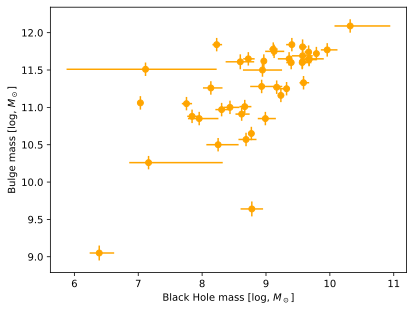

In [23]:
plt.figure()
plt.xlabel('Black Hole mass [log, $M_\odot$]')
plt.ylabel('Bulge mass [log, $M_\odot$]')
plt.errorbar(y=mB, yerr=mBerr, x=mBH, xerr=[mBHhi-mBH, mBH-mBHlo], 
             marker='o', ls=' ', color='orange');
